In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

figsize = (15,15)

## TP Data loading (TPs and IDEs) + Waaveforms for event 47

In [2]:
import tpvalidator.basic as tvb
import tpvalidator.utilities as utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# data_path = "../data/vd/ide/tpgtree_st_mu_minus_vd_tpg_2_old.root"
data_path = "../data/vd/ide/tpgtree_st_eminus_vd_tpg_9.root"
mu_vd = tvb.BasicTPData(data_path)

# FIXME: Waveform loading to be better integrated with the data object
waves = utils.load_sparse_waveform_data("../data/vd/ide/trigger_digits_waves_eminus_vd_detsim_5.root")
ev_num = int(waves.event.unique()[0])
mu_vd.waveforms[ev_num] = waves
waves = utils.load_sparse_waveform_data("../data/vd/ide/trigger_digits_waves_eminus_vd_detsim_2.root")
ev_num = int(waves.event.unique()[0])
mu_vd.waveforms[ev_num] = waves

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

[583]

1

[209]

1

## Dataset visual inspection

/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: divide by zero encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: overflow encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)


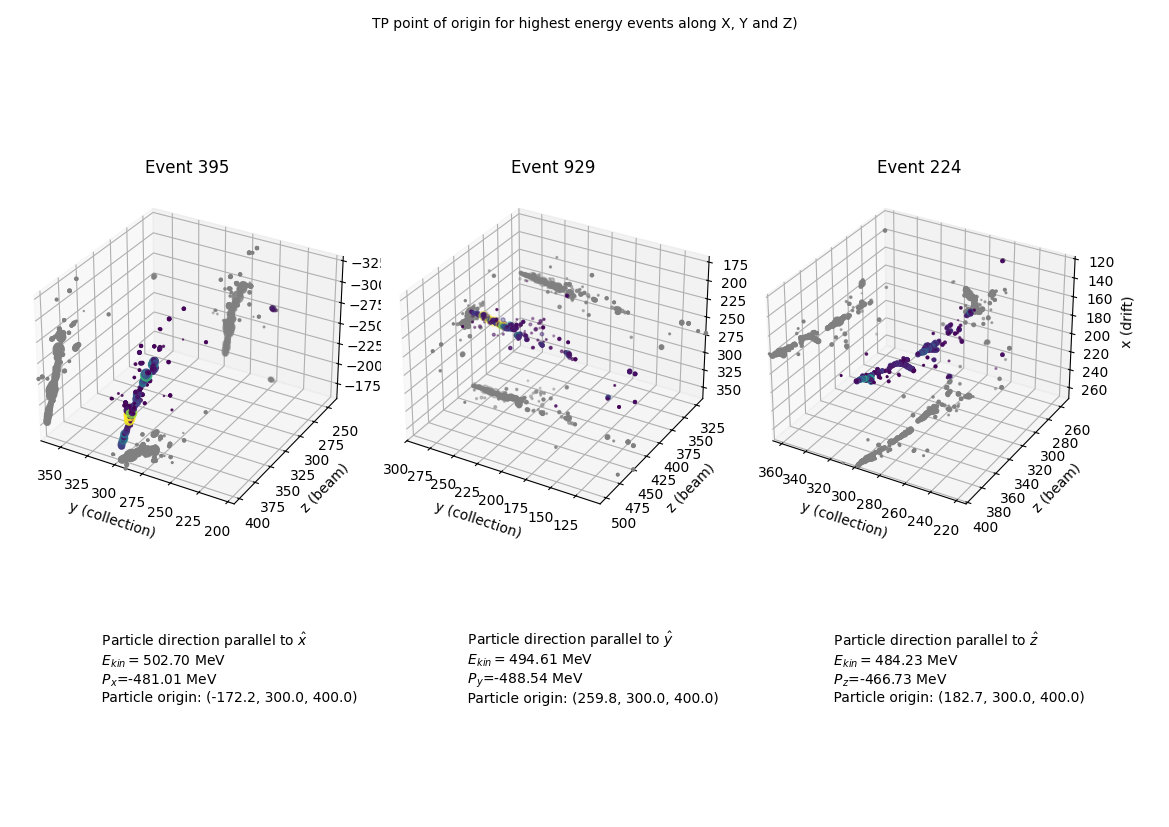

In [3]:
fig = tvb.plot_3dev_points_of_origin(mu_vd)
fig.tight_layout()

## Event with poor backtracking efficiency of new algorithm

In [4]:
display(mu_vd.mc[(mu_vd.mc.detQ_U / mu_vd.mc.totQ_U) <  0.4])

display(mu_vd.mc[(mu_vd.mc.detQ_X / mu_vd.mc.totQ_X) <  0.8])
display(mu_vd.mc[(mu_vd.mc.detQ_X / mu_vd.mc.totQ_X) >  0.95])



event       Eng        Ekin      startX  startY  startZ  \
entry subentry                                                            
88    0            89  0.187195  186.683990 -284.543824   300.0   400.0   
208   0           209  0.055845   55.334160 -247.058666   300.0   400.0   
410   0           411  0.014131   13.619542  -63.798630   300.0   400.0   
582   0           583  0.314513  314.002136  292.263865   300.0   400.0   

                      Px        Py        Pz         P        totQ_X  \
entry subentry                                                         
88    0        -0.187138 -0.003794  0.002608  0.187194  3.053639e+06   
208   0        -0.055162 -0.003575  0.007923  0.055843  1.068837e+06   
410   0         0.012745 -0.002349  0.005608  0.014121  3.060683e+05   
582   0         0.252571  0.173359 -0.071222  0.314513  6.050292e+06   

                      totQ_U        totQ_V       detQ_X        detQ_U  \
entry subentry                                                          
88    0         3.057167e+06  3.057308e+06  2806438.250  1.202614e+06   
208   0         1.070093e+06  1.070188e+06   962513.875  2.324847e+05   
410   0         3.063573e+05  3.062558e+05   293641.125  1.133668e+05   
582   0         6.050310e+06  6.050304e+06  3448581.500  2.245906e+06   

                      detQ_V  
entry subentry                
88    0         1.275073e+06  
208   0         1.955258e+05  
410   0         1.208978e+05  
582   0         3.041362e+06

event       Eng        Ekin      startX  startY  startZ  \
entry subentry                                                            
449   0           450  0.425241  424.729553  289.021790   300.0   400.0   
582   0           583  0.314513  314.002136  292.263865   300.0   400.0   

                      Px        Py        Pz         P     totQ_X     totQ_U  \
entry subentry                                                                 
449   0         0.325119 -0.055499 -0.268415  0.425240  6467466.0  6467480.5   
582   0         0.252571  0.173359 -0.071222  0.314513  6050291.5  6050310.5   

                   totQ_V     detQ_X     detQ_U      detQ_V  
entry subentry                                               
449   0         6467487.5  4223204.5  3375418.5  3408302.75  
582   0         6050304.5  3448581.5  2245906.0  3041362.25

event       Eng        Ekin      startX  startY  startZ  \
entry subentry                                                            
0     0             1  0.152532  152.021042   97.601366   300.0   400.0   
1     0             2  0.208081  207.570404   86.575413   300.0   400.0   
2     0             3  0.362096  361.584839   87.799966   300.0   400.0   
6     0             7  0.407513  407.002167  -20.506203   300.0   400.0   
8     0             9  0.400117  399.606384   20.287979   300.0   400.0   
...               ...       ...         ...         ...     ...     ...   
994   0           995  0.363319  362.808044  -75.857127   300.0   400.0   
995   0           996  0.013235   12.723893  -94.765806   300.0   400.0   
996   0           997  0.177529  177.017944  259.419894   300.0   400.0   
998   0           999  0.416459  415.947998  150.796151   300.0   400.0   
999   0          1000  0.383604  383.092590   42.867529   300.0   400.0   

                      Px        Py        Pz         P        totQ_X  \
entry subentry                                                         
0     0         0.087321  0.060927 -0.109218  0.152531  3.639377e+06   
1     0         0.052430 -0.022690 -0.200085  0.208081  4.877296e+06   
2     0         0.239194  0.174292  0.208619  0.362095  8.699513e+06   
6     0        -0.049531 -0.395037 -0.086944  0.407513  9.049716e+06   
8     0        -0.326989 -0.221703  0.063402  0.400117  9.026954e+06   
...                  ...       ...       ...       ...           ...   
994   0        -0.108670  0.081524 -0.336965  0.363319  7.748655e+06   
995   0        -0.006475  0.006499 -0.009526  0.013225  2.747719e+05   
996   0        -0.142654 -0.034766  0.099788  0.177528  4.586296e+06   
998   0         0.195177 -0.311018  0.196498  0.416459  1.040191e+07   
999   0        -0.279750  0.260851 -0.029128  0.383603  8.349061e+06   

                      totQ_U        totQ_V        detQ_X        detQ_U  \
entry subentry                                                           
0     0         3.640214e+06  3.640187e+06  3.554598e+06  2.503446e+06   
1     0         4.878805e+06  4.878728e+06  4.698509e+06  4.317439e+06   
2     0         8.701574e+06  8.701831e+06  8.414972e+06  7.151878e+06   
6     0         9.053957e+06  9.054401e+06  8.726694e+06  7.354385e+06   
8     0         9.031302e+06  9.031184e+06  8.610856e+06  6.170296e+06   
...                      ...           ...           ...           ...   
994   0         7.753534e+06  7.753777e+06  7.428862e+06  6.345792e+06   
995   0         2.750137e+05  2.749892e+05  2.735470e+05  2.699234e+05   
996   0         4.586563e+06  4.586561e+06  4.478984e+06  2.986560e+06   
998   0         1.040341e+07  1.040336e+07  1.012442e+07  8.722010e+06   
999   0         8.352558e+06  8.352584e+06  7.993632e+06  6.337716e+06   

                      detQ_V  
entry subentry                
0     0         3.324748e+06  
1     0         4.301318e+06  
2     0         6.343103e+06  
6     0         7.434535e+06  
8     0         6.630450e+06  
...                      ...  
994   0         6.296816e+06  
995   0         2.742517e+05  
996   0         3.741954e+06  
998   0         9.076865e+06  
999   0         6.712462e+06  

[756 rows x 16 columns]

In [5]:
mu_vd.angles[mu_vd.angles.event.isin(list(mu_vd.mc[(mu_vd.mc.detQ_U / mu_vd.mc.totQ_U) <  0.3].event))]

event    theta_y   theta_yU   theta_yV   theta_xz  theta_xzU  \
entry subentry                                                                 
208   0           209  93.670876  98.910469  84.786583  81.826019  89.101234   

                theta_xzV  theta_drift  theta_beam  theta_coll    theta_u  \
entry subentry                                                              
208   0         82.708557   171.044662   81.842903   93.670876  81.089523   

                  theta_v    phi_coll   phi_ind_u   phi_ind_v  
entry subentry                                                 
208   0         84.786583  171.826004  179.101227  172.708557

## Event 208, low backtracker efficiency with old algorithm 

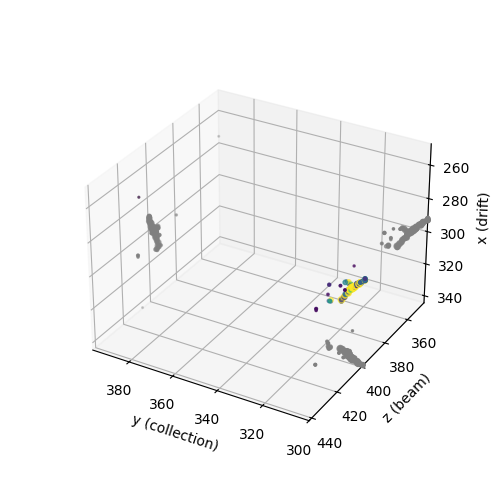

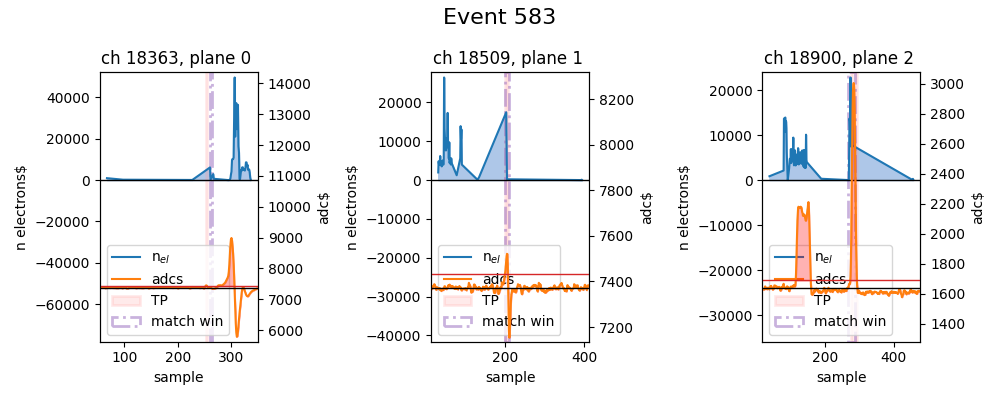

In [6]:
from tpvalidator.backtracker import BackTrackerPlotter
from tpvalidator.basic import draw_tps_point_of_origin

ev_num = 583

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(5,5))
draw_tps_point_of_origin(ax, mu_vd, ev_num, is_signal=True)

tp_idx = [4,0,4]


btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_one_per_plane(tp_idx, figsize=(10,4))

fig.tight_layout()



## Entry 583, low efficiency ( < 0.2) on X plane

|   entry |   subentry |   event |   n_TPs |   TP_channel |   TP_startT |   TP_peakT |   TP_peakADC |   TP_SADC |   TP_TOT |   TP_plane |   TP_TPC |   TP_trueX |   TP_trueY |   TP_trueZ |
|--------:|-----------:|--------:|--------:|-------------:|------------:|-----------:|-------------:|----------:|---------:|-----------:|---------:|-----------:|-----------:|-----------:|
|       0 |        583 |      98 |   18370 |          102 |         107 |        277 |         2031 |        11 |        0 |         21 |      315 |        313 |        393 |          1 |
|       1 |        583 |      98 |   18509 |          199 |         204 |        149 |          892 |         8 |        1 |         21 |      308 |        319 |        392 |          1 |
|       2 |        583 |      98 |   18900 |          275 |         284 |       1369 |        14862 |        19 |        2 |         21 |      302 |        310 |        393 |          1 |


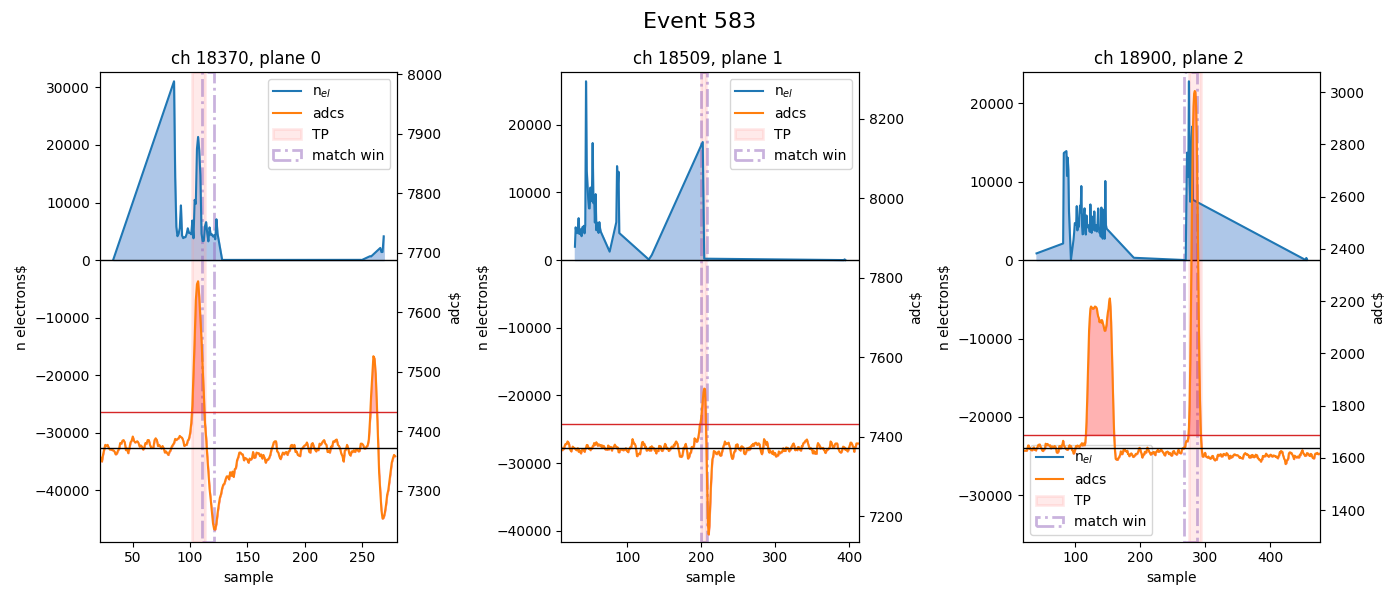

In [7]:
ev_num = 583

# fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8,8))
# basic.draw_tps_point_of_origin(ax, mu, ev_num, is_signal=True)

tp_idx = [40,46,66]

# df_sel_tps = plot_3_tps_and_ides_from_event(mu_vd, ev_num, tp_idx)
# print(df_sel_tps.to_markdown())
# print(mu_vd.mc[mu_vd.mc.event == ev_num].to_markdown())

btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_one_per_plane([20,0,4], figsize=(14,6))

fig.tight_layout()

print(btp.selected_tps.to_markdown())

```ide_chans = set(c for c in mu_vd.ides[mu_vd.ides.event == ev_num].channel.unique())
raw_chans  = set( int(c) for c in chans)

len(ide_chans)
len(raw_chans)
len(raw_chans.intersection(ide_chans))
```


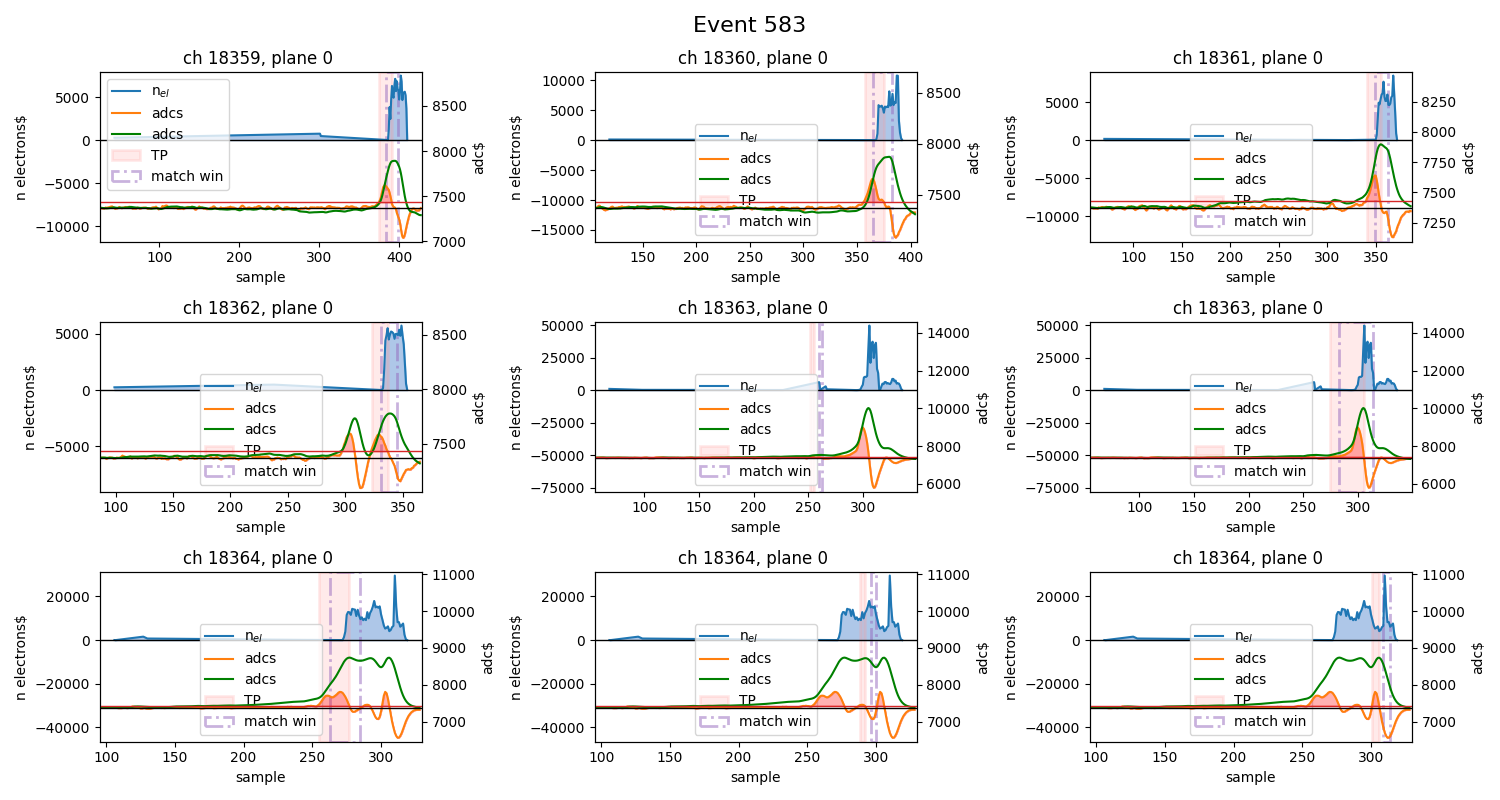

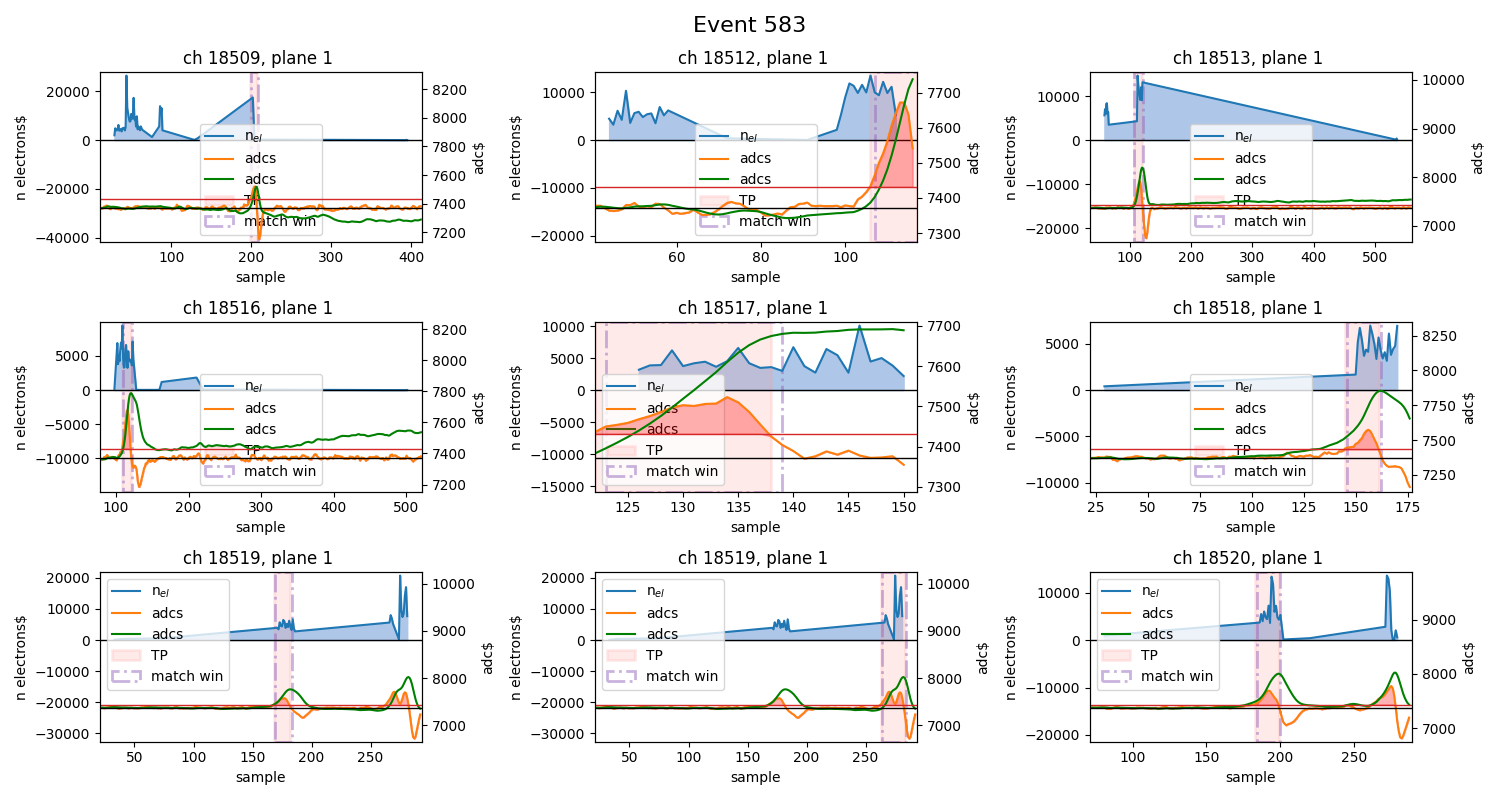

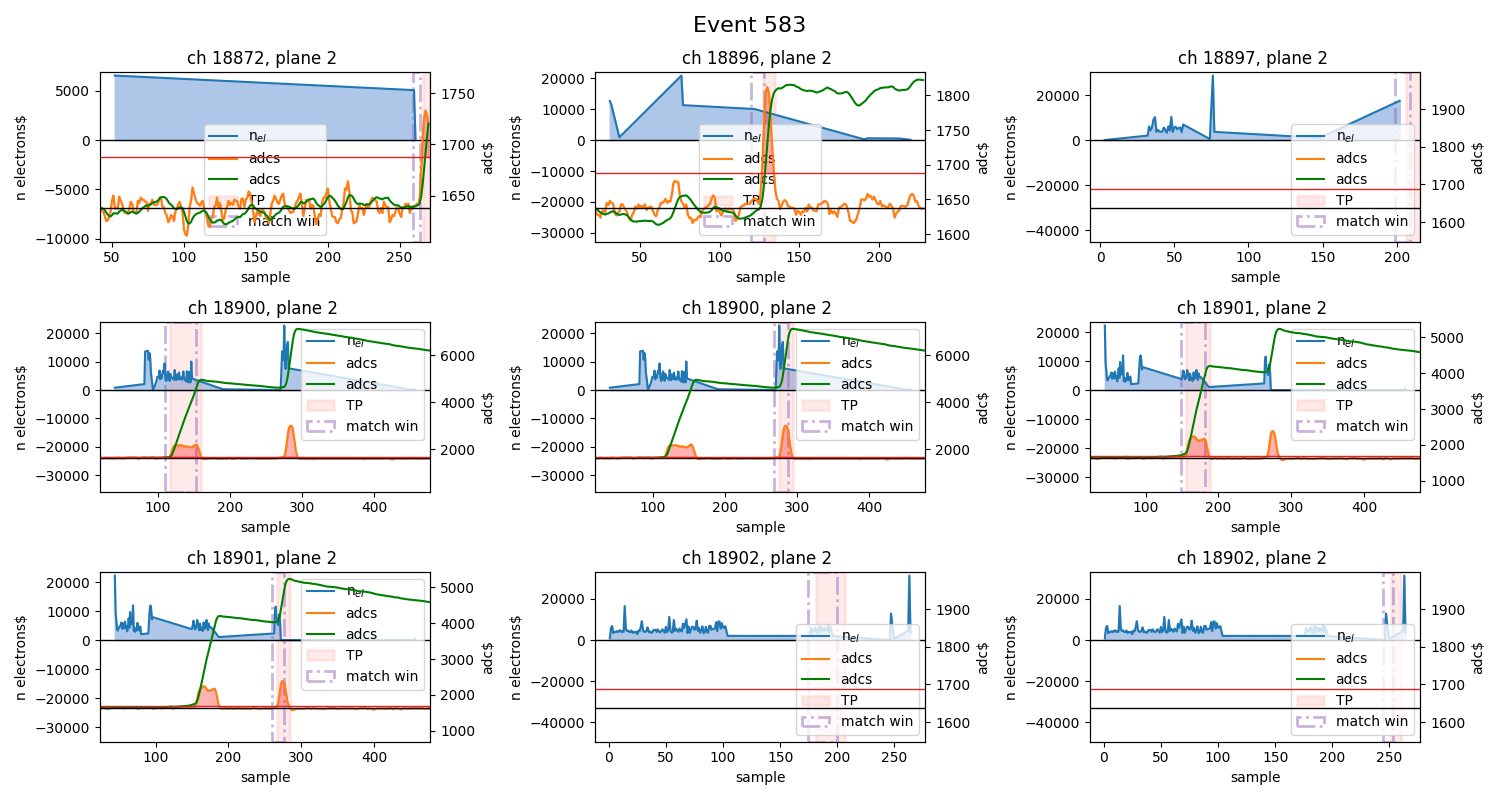

In [20]:


ev_num = 583
from tpvalidator.backtracker import BackTrackerPlotter
btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_by_plane(0, [0,1,2,3,4,5,6,7,8], figsize=(15,8))
fig.tight_layout()

fig = btp.plot_tps_vs_ides_by_plane(1, [0,1,2,3,4,5,6,7,8], figsize=(15,8))
fig.tight_layout()

fig = btp.plot_tps_vs_ides_by_plane(2, [0,1,2,3,4,5,6,7,8], figsize=(15,8))
fig.tight_layout()



# Entry 209, low detQ_U/totU_Q matching efficiency

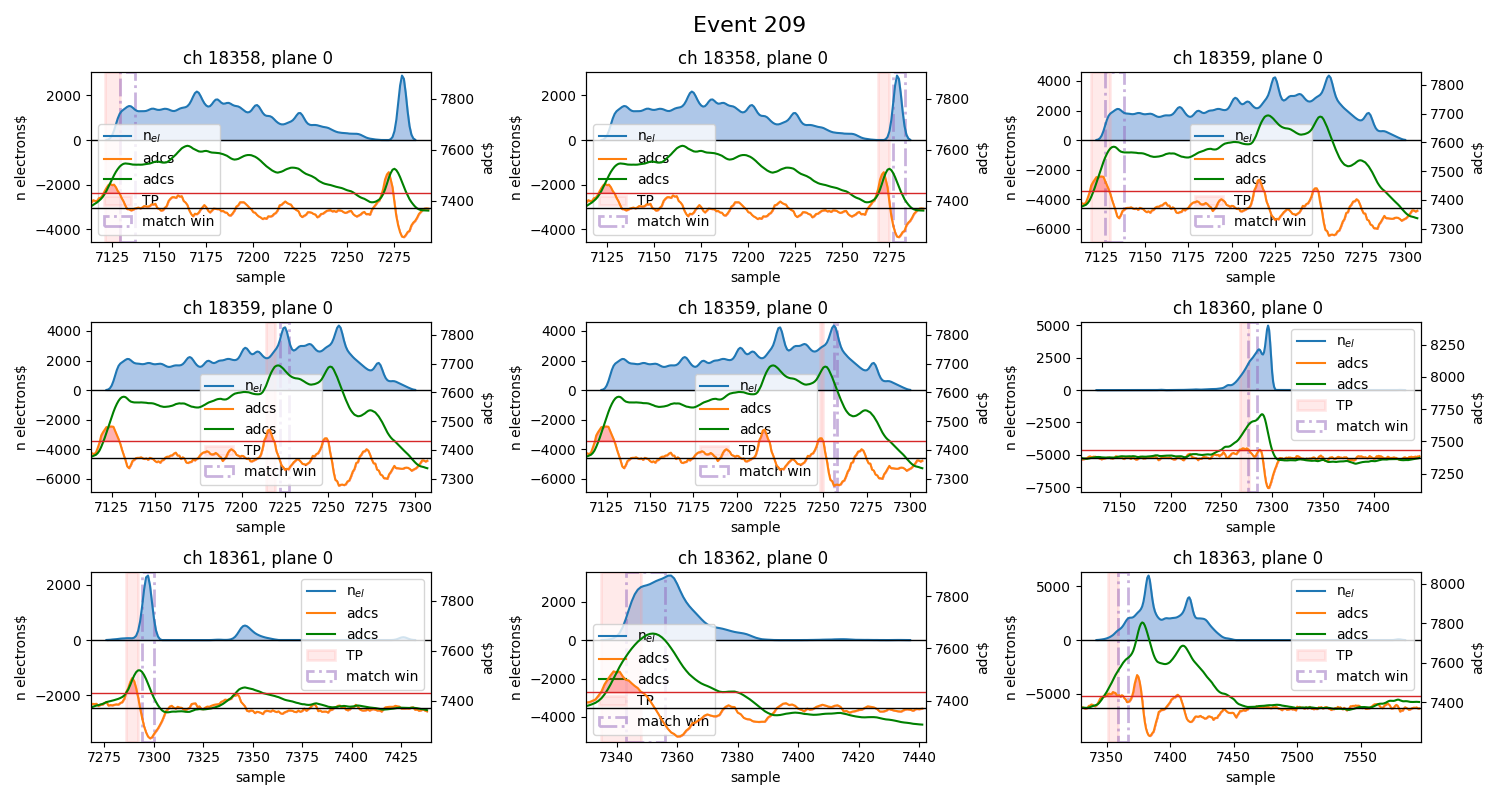

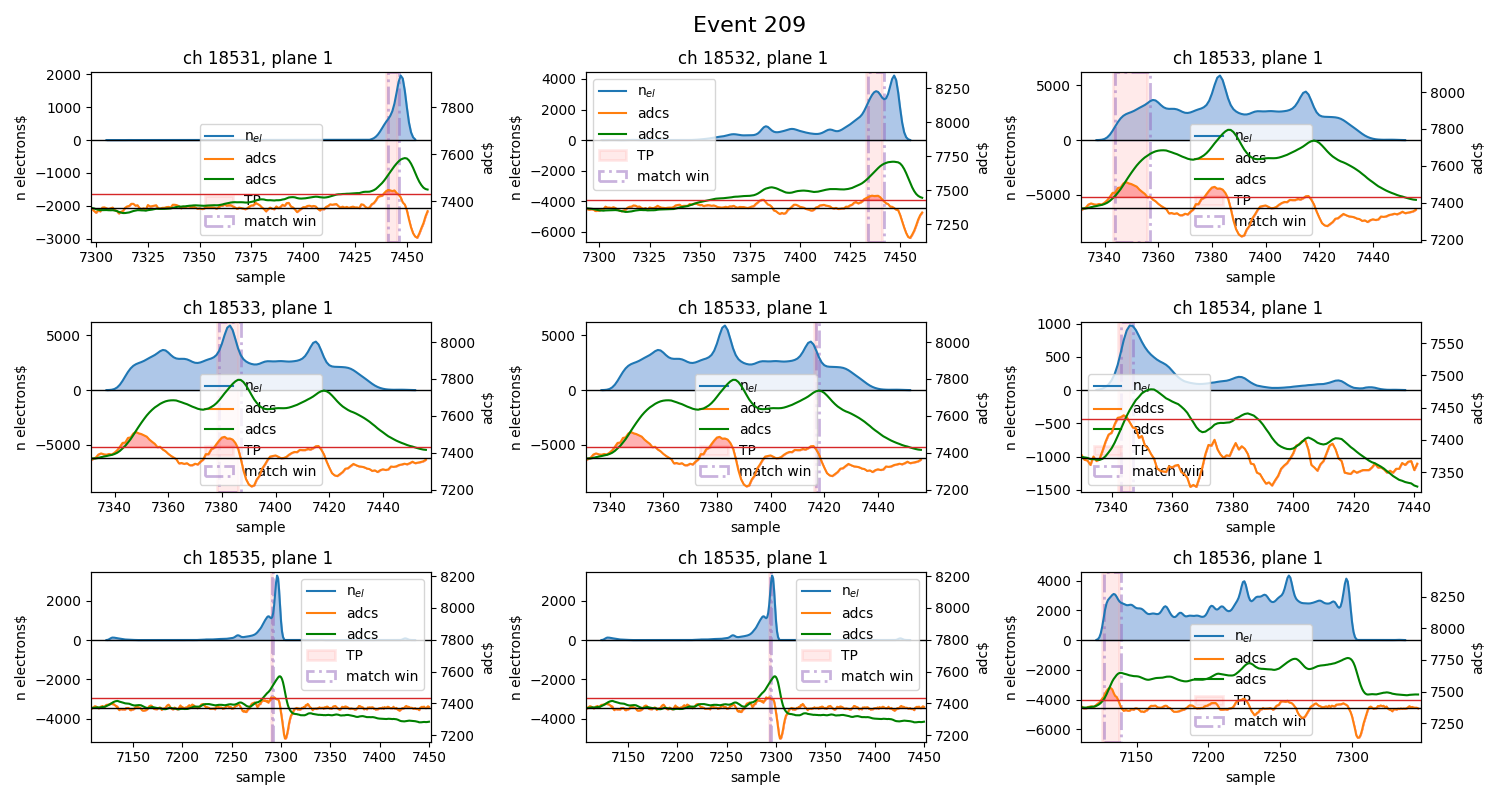

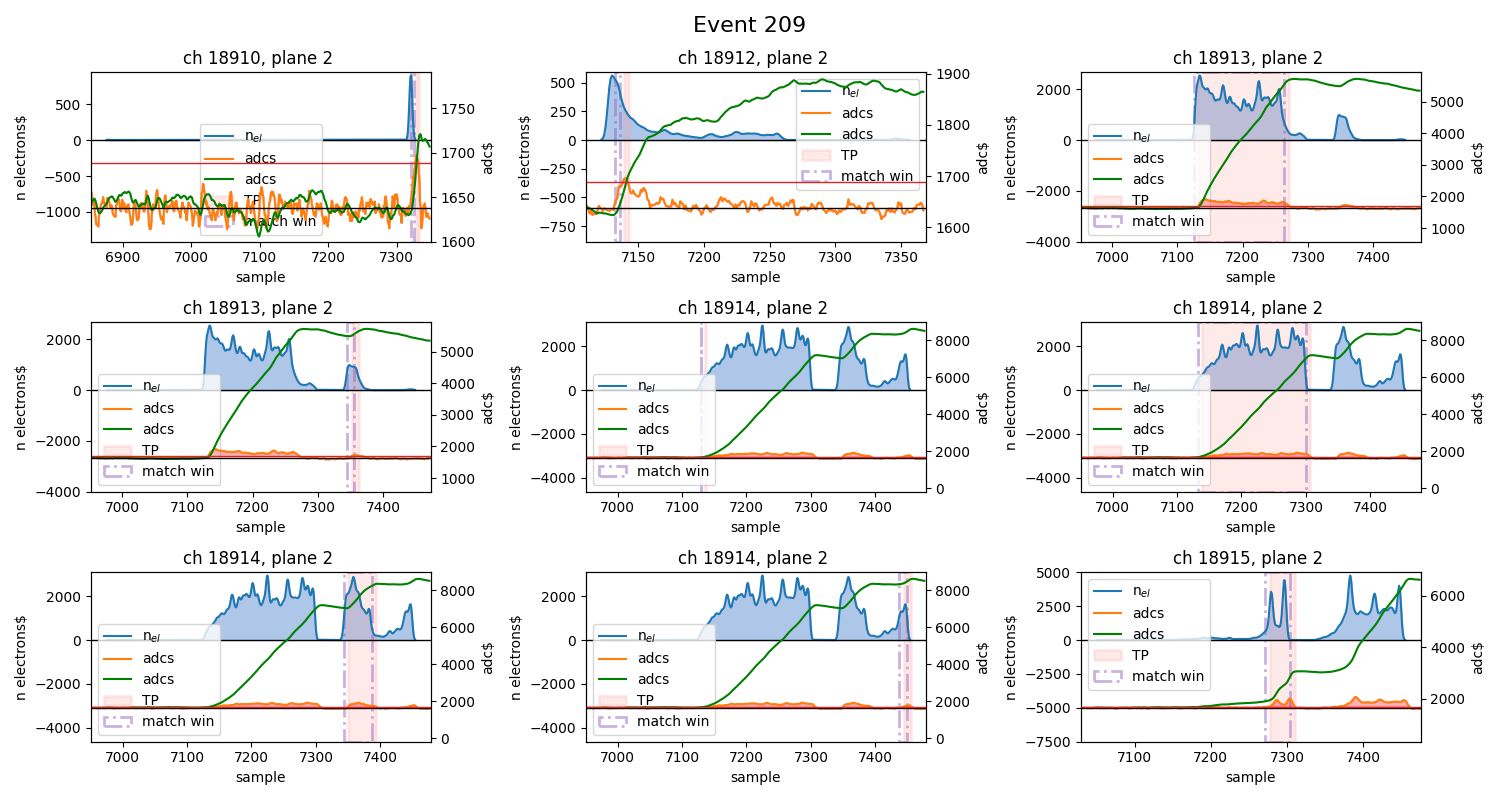

In [21]:

ev_num = 209
from tpvalidator.backtracker import BackTrackerPlotter
btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_by_plane(0, [0,1,2,3,4,5,6,7,8], figsize=(15,8))
fig.tight_layout()

fig = btp.plot_tps_vs_ides_by_plane(1, [0,1,2,3,4,5,6,7,8], figsize=(15,8))
fig.tight_layout()

fig = btp.plot_tps_vs_ides_by_plane(2, [0,1,2,3,4,5,6,7,8], figsize=(15,8))
fig.tight_layout()


/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_18697/2464324414.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


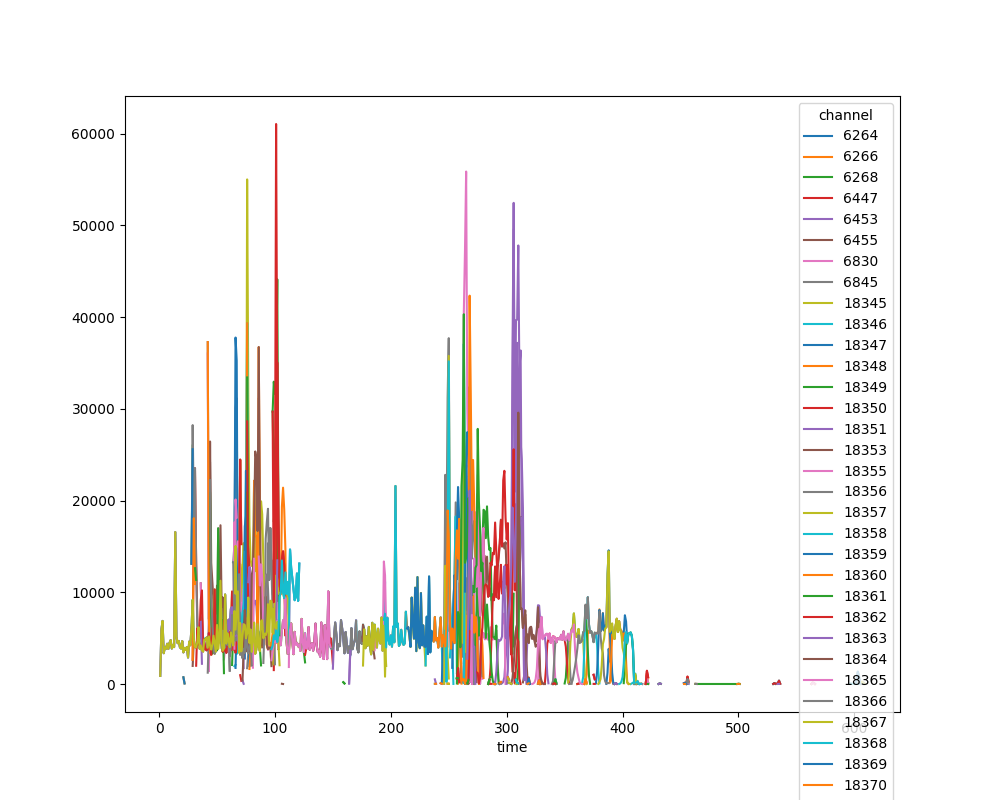

In [10]:
x = mu_vd.ides[mu_vd.ides.event == 583].copy()
y = x[['time', 'nElectrons', 'channel']]
df_pivoted = y.pivot(index='time', columns='channel', values='nElectrons')

df_pivoted.plot(figsize=(10,8))
plt.tight_layout()

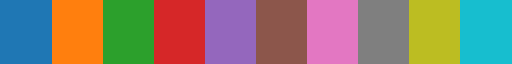

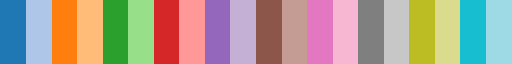

In [11]:
import matplotlib
cmap = matplotlib.colormaps['tab10']

display(cmap)
cmap = matplotlib.colormaps['tab20']
display(cmap)


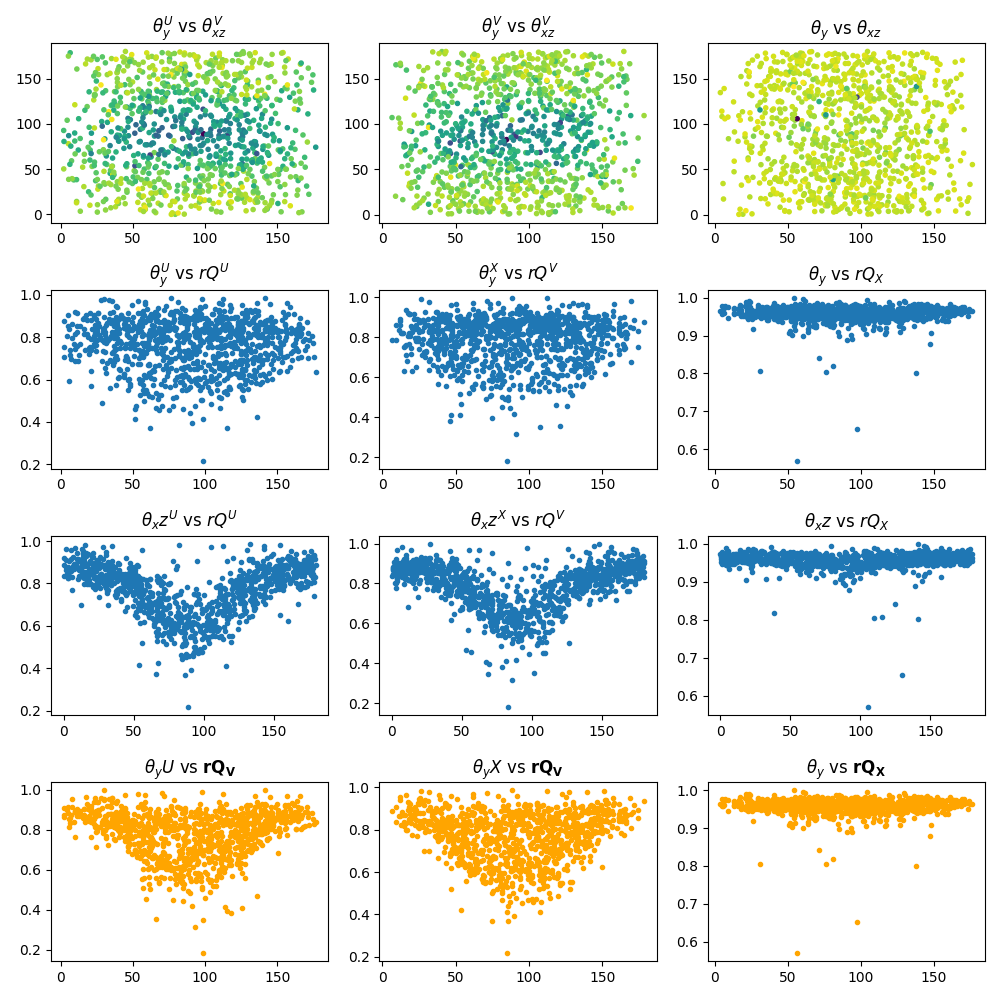

In [ ]:
x = mu_vd.mc.copy()
x['rQ_U'] = x.detQ_U/x.totQ_U
x['rQ_V'] = x.detQ_V/x.totQ_V
x['rQ_X'] = x.detQ_X/x.totQ_X

# x.rQ_X.hist(bins=100)

y = x.join(mu_vd.angles, lsuffix='_caller', rsuffix='_other')

m = '.'
figsize=(10,10)

fig, ax = plt.subplots(4,3, figsize=figsize)

ax[0][0].set_title(r"$\theta_y^U$ vs $\theta_{xz}^V$")
ax[0][1].set_title(r"$\theta_y^V$ vs $\theta_{xz}^V$")
ax[0][2].set_title(r"$\theta_y$ vs $\theta_{xz}$")

ax[0][0].scatter(y.theta_yU, y.theta_xzU, c=y.rQ_U, marker=m)
ax[0][1].scatter(y.theta_yV, y.theta_xzV, c=y.rQ_V, marker=m)
ax[0][2].scatter(y.theta_y, y.theta_xz, c=y.rQ_X, marker=m)

ax[1][0].set_title(r"$\theta_y^U$ vs $rQ^U$")
ax[1][1].set_title(r"$\theta_y^X$ vs $rQ^V$")
ax[1][2].set_title(r"$\theta_y$ vs $rQ_X$")

ax[1][0].scatter( y.theta_yU, y.rQ_U, marker=m)
ax[1][1].scatter( y.theta_yV, y.rQ_V, marker=m)
ax[1][2].scatter( y.theta_y,  y.rQ_X, marker=m)

ax[2][0].set_title(r"$\theta_xz^U$ vs $rQ^U$")
ax[2][1].set_title(r"$\theta_xz^X$ vs $rQ^V$")
ax[2][2].set_title(r"$\theta_xz$ vs $rQ_X$")

ax[2][0].scatter(y.theta_xzU, y.rQ_U, marker=m)
ax[2][1].scatter(y.theta_xzV, y.rQ_V, marker=m)
ax[2][2].scatter(y.theta_xz, y.rQ_X, marker=m)

ax[3][0].set_title(r"$\theta_yU$ vs $\mathbf{rQ_V}$")
ax[3][1].set_title(r"$\theta_yX$ vs $\mathbf{rQ_V}$")
ax[3][2].set_title(r"$\theta_y$ vs $\mathbf{rQ_X}$")

ax[3][0].scatter( y.theta_yU, y.rQ_V, marker=m, c='orange')
ax[3][1].scatter( y.theta_yV, y.rQ_U, marker=m, c='orange')
ax[3][2].scatter( y.theta_y,  y.rQ_X, marker=m, c='orange')
fig.tight_layout()




{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

Using VD strip geometry (ϑ=30.0°, ϑ=-30.0°)

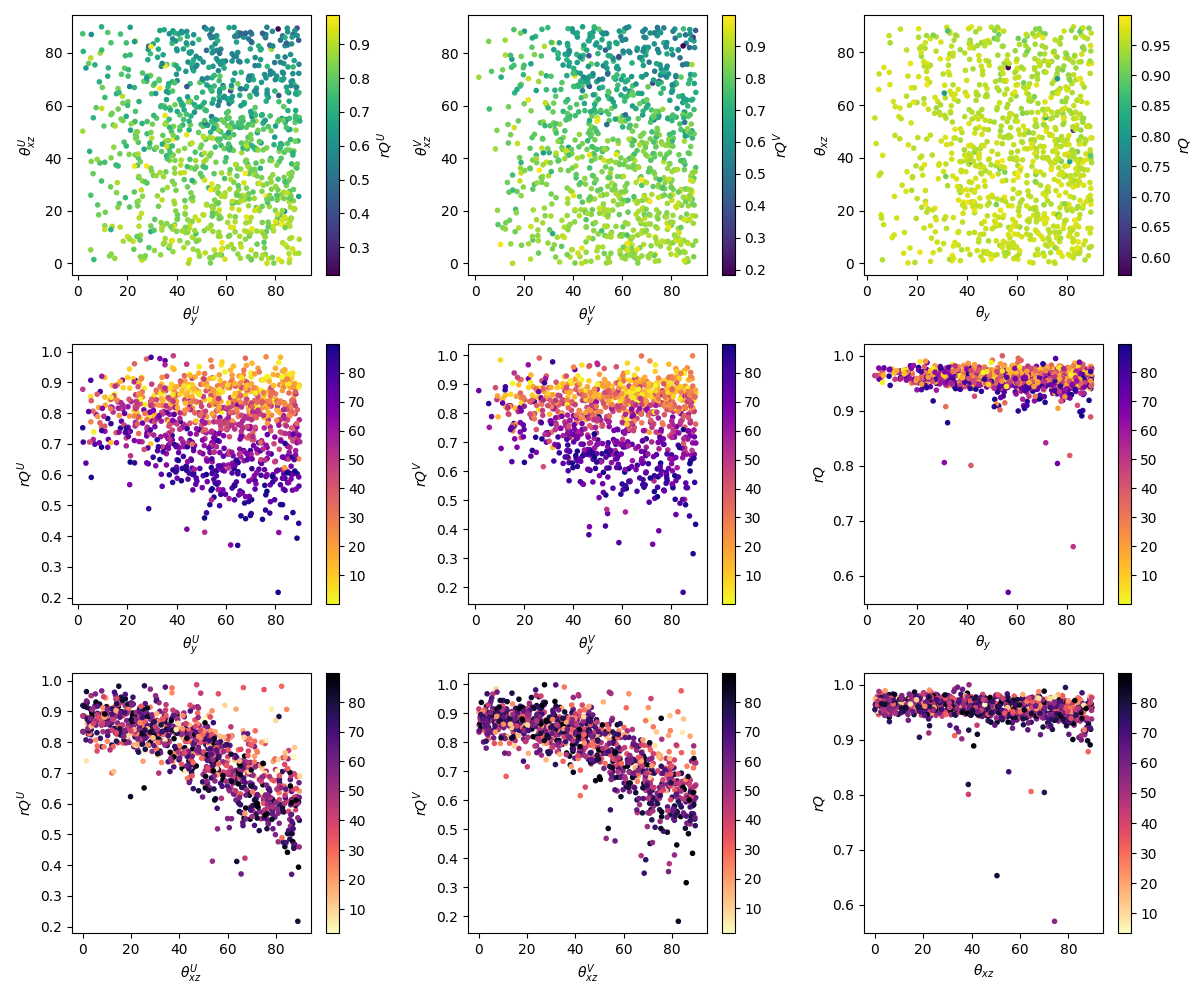

In [ ]:
mu_vd._init_angles()

x = mu_vd.mc.copy()
x['rQ_U'] = x.detQ_U/x.totQ_U
x['rQ_V'] = x.detQ_V/x.totQ_V
x['rQ_X'] = x.detQ_X/x.totQ_X

y = x.join(mu_vd.angles.set_index('event'), on='event')

m = '.'
figsize=(12,10)

fig, ax = plt.subplots(3,3, figsize=figsize)

# ax[0][0].set_title(r"$\theta_y^U$ vs $\theta_{xz}^V$")
# ax[0][1].set_title(r"$\theta_y^V$ vs $\theta_{xz}^V$")
# ax[0][2].set_title(r"$\theta_y$ vs $\theta_{xz}$")

ax[0][0].set_xlabel(r"$\theta_y^U$")
ax[0][1].set_xlabel(r"$\theta_y^V$")
ax[0][2].set_xlabel(r"$\theta_y$")

ax[0][0].set_ylabel(r"$\theta_{xz}^U$")
ax[0][1].set_ylabel(r"$\theta_{xz}^V$")
ax[0][2].set_ylabel(r"$\theta_{xz}$")


sU = ax[0][0].scatter(y.theta_yU, y.theta_xzU, c=y.rQ_U, marker=m)
sV = ax[0][1].scatter(y.theta_yV, y.theta_xzV, c=y.rQ_V, marker=m)
sX = ax[0][2].scatter(y.theta_y, y.theta_xz, c=y.rQ_X, marker=m)

plt.colorbar(sU, label = r"$rQ^U$")
plt.colorbar(sV, label = r"$rQ^V$")
plt.colorbar(sX, label = r"$rQ$")

# ax[1][0].set_title(r"$\theta_y^U$ vs $rQ^U$")
# ax[1][1].set_title(r"$\theta_y^V$ vs $rQ^V$")
# ax[1][2].set_title(r"$\theta_y$ vs $rQ_X$")

ax[1][0].set_xlabel(r"$\theta_y^U$")
ax[1][1].set_xlabel(r"$\theta_y^V$")
ax[1][2].set_xlabel(r"$\theta_y$")

ax[1][0].set_ylabel(r"$rQ^U$")
ax[1][1].set_ylabel(r"$rQ^V$")
ax[1][2].set_ylabel(r"$rQ$")



sU = ax[1][0].scatter( y.theta_yU, y.rQ_U, c=y.theta_xzU, marker=m, cmap='plasma_r')
sV = ax[1][1].scatter( y.theta_yV, y.rQ_V, c=y.theta_xzV, marker=m, cmap='plasma_r')
sX = ax[1][2].scatter( y.theta_y,  y.rQ_X, c=y.theta_xz, marker=m, cmap='plasma_r')

plt.colorbar(sU)
plt.colorbar(sV)
plt.colorbar(sX)

# ax[2][0].set_title(r"$\theta_{xz}^U$ vs $rQ^U$")
# ax[2][1].set_title(r"$\theta_{xz}^X$ vs $rQ^V$")
# ax[2][2].set_title(r"$\theta_{xz}$ vs $rQ^X$")

ax[2][0].set_xlabel(r"$\theta_{xz}^U$")
ax[2][1].set_xlabel(r"$\theta_{xz}^V$")
ax[2][2].set_xlabel(r"$\theta_{xz}$")

ax[2][0].set_ylabel(r"$rQ^U$")
ax[2][1].set_ylabel(r"$rQ^V$")
ax[2][2].set_ylabel(r"$rQ$")


sU = ax[2][0].scatter(y.theta_xzU, y.rQ_U, c=y.theta_yU, marker=m, cmap='magma_r')
sV = ax[2][1].scatter(y.theta_xzV, y.rQ_V, c=y.theta_yV, marker=m, cmap='magma_r')
sX = ax[2][2].scatter(y.theta_xz, y.rQ_X, c=y.theta_y, marker=m, cmap='magma_r')

plt.colorbar(sU)
plt.colorbar(sV)
plt.colorbar(sX)


fig.tight_layout()




{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

Using VD strip geometry (ϑ=30.0°, ϑ=-30.0°)

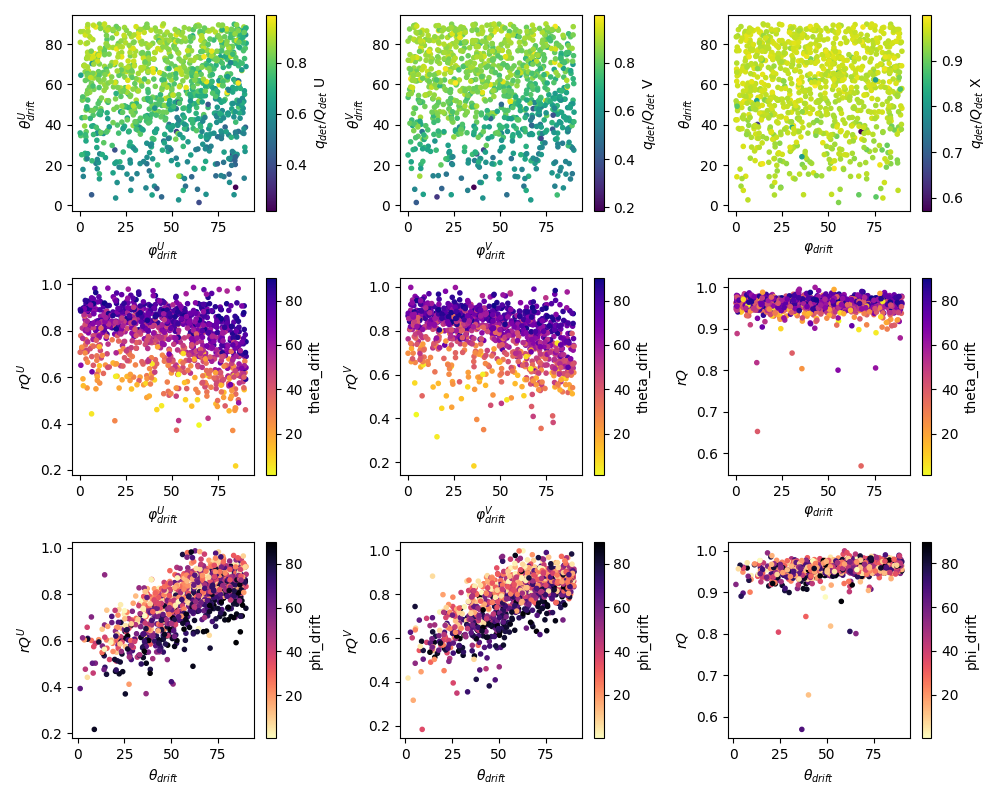

In [41]:
mu_vd._init_angles()

x = mu_vd.mc.copy()
x['rQ_U'] = x.detQ_U/x.totQ_U
x['rQ_V'] = x.detQ_V/x.totQ_V
x['rQ_X'] = x.detQ_X/x.totQ_X
y = x.join(mu_vd.angles.set_index('event'), on='event')

m='.'
fig, ax = plt.subplots(3,3, figsize=(10,8))
sU = ax[0][0].scatter(x=y.phi_drift_u, y=y.theta_drift, c=y.rQ_U, marker=m)
sV = ax[0][1].scatter(x=y.phi_drift_v, y=y.theta_drift, c=y.rQ_V, marker=m)
sX = ax[0][2].scatter(x=y.phi_drift,   y=y.theta_drift, c=y.rQ_X, marker=m)

ax[0][0].set_xlabel(r"$\varphi_{drift}^U$")
ax[0][1].set_xlabel(r"$\varphi_{drift}^V$")
ax[0][2].set_xlabel(r"$\varphi_{drift}$")

ax[0][0].set_ylabel(r"$\theta_{drift}^U$")
ax[0][1].set_ylabel(r"$\theta_{drift}^V$")
ax[0][2].set_ylabel(r"$\theta_{drift}$")

plt.colorbar(sU, label = r"$q_{det}/Q_{det}$ U")
plt.colorbar(sV, label = r"$q_{det}/Q_{det}$ V")
plt.colorbar(sX, label = r"$q_{det}/Q_{det}$ X")

sU = ax[1][0].scatter(x=y.phi_drift_u, c=y.theta_drift, y=y.rQ_U, marker=m, cmap='plasma_r')
sV = ax[1][1].scatter(x=y.phi_drift_v, c=y.theta_drift, y=y.rQ_V, marker=m, cmap='plasma_r')
sX = ax[1][2].scatter(x=y.phi_drift,   c=y.theta_drift, y=y.rQ_X, marker=m, cmap='plasma_r')

ax[1][0].set_xlabel(r"$\varphi_{drift}^U$")
ax[1][1].set_xlabel(r"$\varphi_{drift}^V$")
ax[1][2].set_xlabel(r"$\varphi_{drift}$")

ax[1][0].set_ylabel(r"$rQ^U$")
ax[1][1].set_ylabel(r"$rQ^V$")
ax[1][2].set_ylabel(r"$rQ$")

plt.colorbar(sU, label="theta_drift")
plt.colorbar(sV, label="theta_drift")
plt.colorbar(sX, label="theta_drift")


sU = ax[2][0].scatter(c=y.phi_drift_u, x=y.theta_drift, y=y.rQ_U, marker=m, cmap='magma_r')
sV = ax[2][1].scatter(c=y.phi_drift_v, x=y.theta_drift, y=y.rQ_V, marker=m, cmap='magma_r')
sX = ax[2][2].scatter(c=y.phi_drift,   x=y.theta_drift, y=y.rQ_X, marker=m, cmap='magma_r')

ax[2][0].set_xlabel(r"$\theta_{drift}$")
ax[2][1].set_xlabel(r"$\theta_{drift}$")
ax[2][2].set_xlabel(r"$\theta_{drift}$")

ax[2][0].set_ylabel(r"$rQ^U$")
ax[2][1].set_ylabel(r"$rQ^V$")
ax[2][2].set_ylabel(r"$rQ$")

plt.colorbar(sU, label="phi_drift")
plt.colorbar(sV, label="phi_drift")
plt.colorbar(sX, label="phi_drift")

fig.tight_layout()